In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%config IPCompleter.greedy=True

In [2]:
def load_img():
    black_img=np.zeros((600,600))
    font=cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(black_img, text="ABCDE", org=(50,300), fontFace=font, fontScale=5, color=(255,255,255), thickness=25,lineType=cv2.LINE_AA)
    return black_img

In [3]:
def display_img(img):
    fig=plt.figure(figsize=(12,10)) #Tamano de la imagen
    ax=fig.add_subplot(111) #Celda 111 (xyz)
    ax.imshow(img,cmap="gray")

In [4]:
img=load_img()

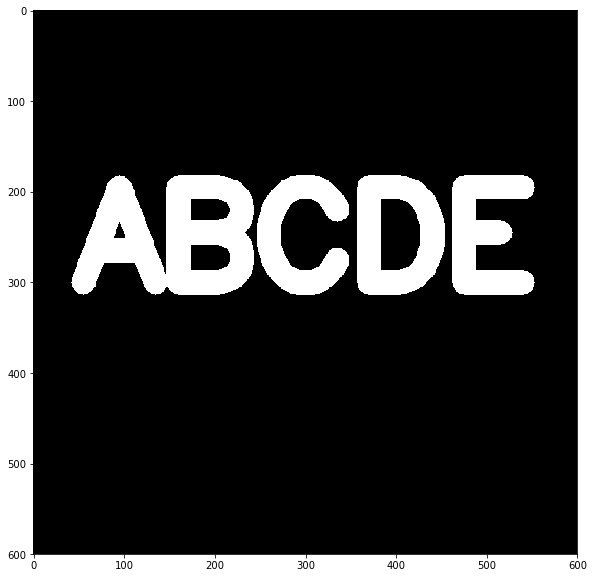

In [5]:
display_img(img)

## Erosion

In [6]:
#Operacion morfologia 

#Erosion
kernel=np.ones((5,5),np.uint8)
erosion1=cv2.erode(img,kernel,iterations=4)

#Erosion, funcion cuando el fondo es oscuro.
#Se necesita de un nucleo.
#La erosion agranda el fondo. 

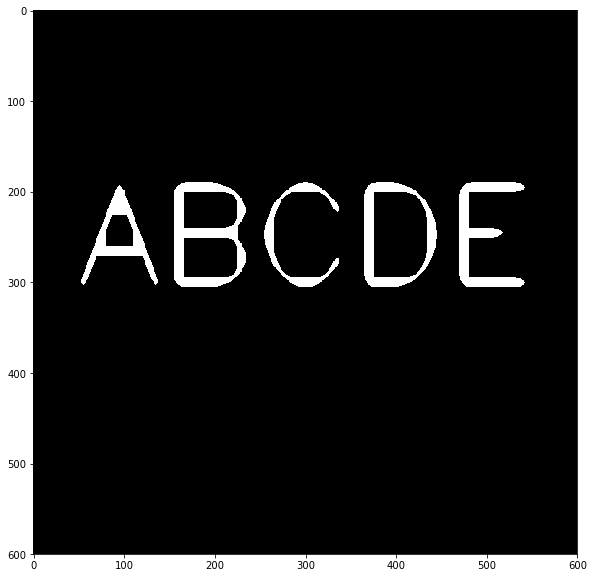

In [7]:
display_img(erosion1)

## Opening

In [8]:
#Util para eliminar el ruido de fondo
#Es una combinacion entre erosion y dilatacion

img=load_img()

In [9]:
#Valores aleatorios entre 0 y 1 (2 porque va hasta menos 1)
white_noise=np.random.randint(low=0,high=2,size=(600,600))

In [10]:
white_noise

array([[0, 1, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 1, 0]])

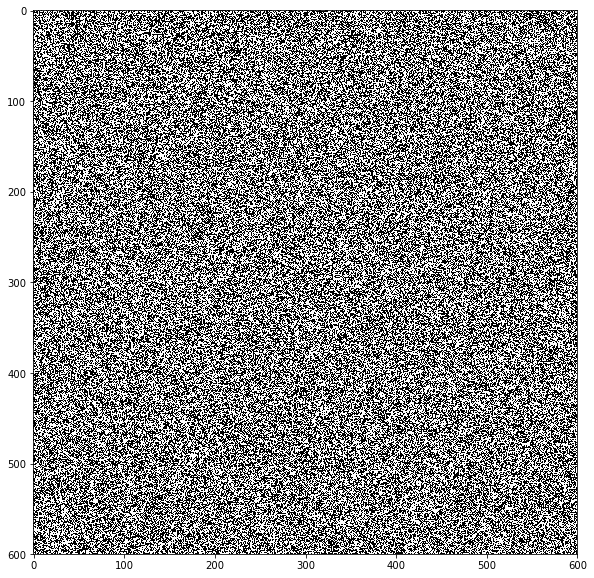

In [11]:
display_img(white_noise)

In [12]:
img.max()

255.0

In [13]:
white_noise=white_noise*255

In [14]:
white_noise

array([[  0, 255, 255, ..., 255,   0,   0],
       [255,   0, 255, ...,   0, 255, 255],
       [  0,   0,   0, ...,   0, 255, 255],
       ...,
       [  0, 255,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0, 255,   0],
       [255, 255,   0, ..., 255, 255,   0]])

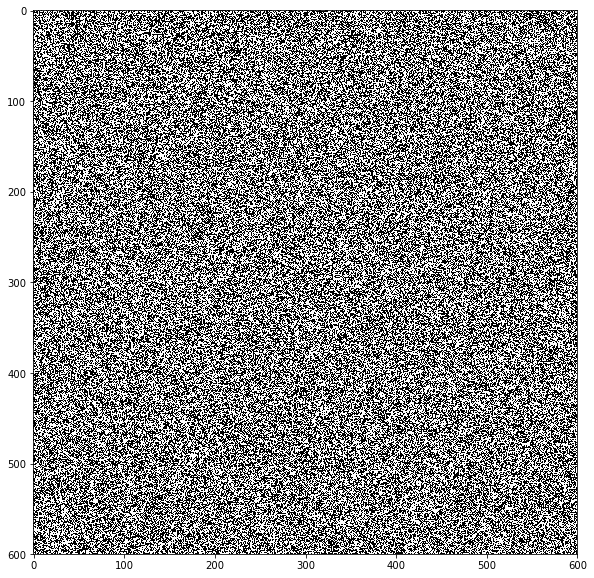

In [15]:
display_img(white_noise)

In [16]:
white_noise.shape

(600, 600)

In [17]:
img.shape

(600, 600)

In [18]:
#Fusionar ruido + tablero
noise_img=white_noise+img

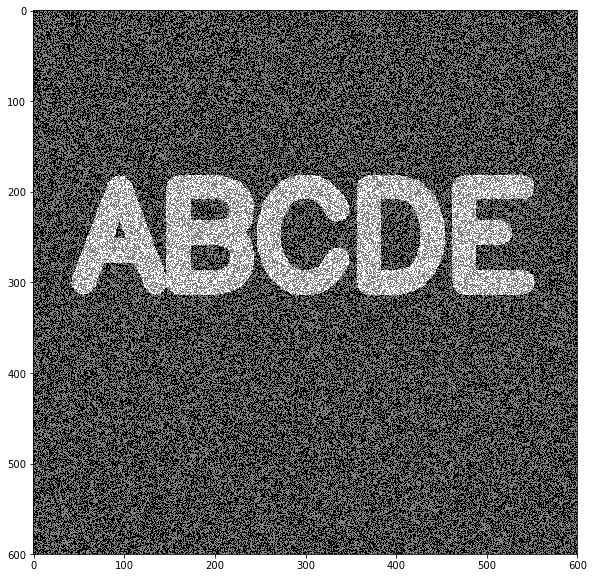

In [19]:
display_img(noise_img)

In [20]:
opening=cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)

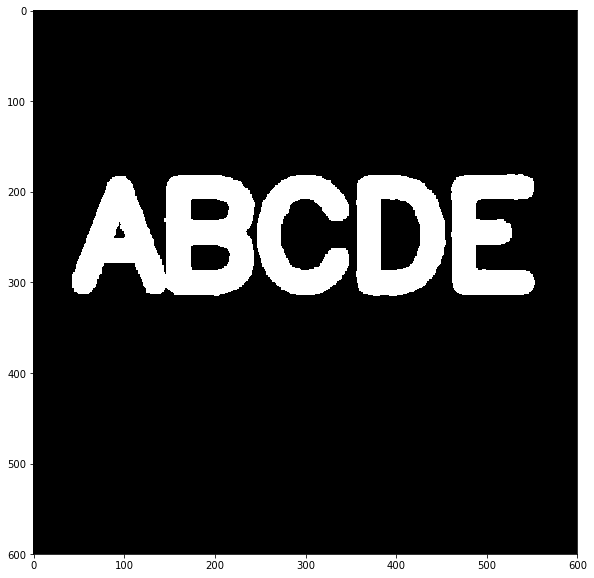

In [21]:
display_img(opening)

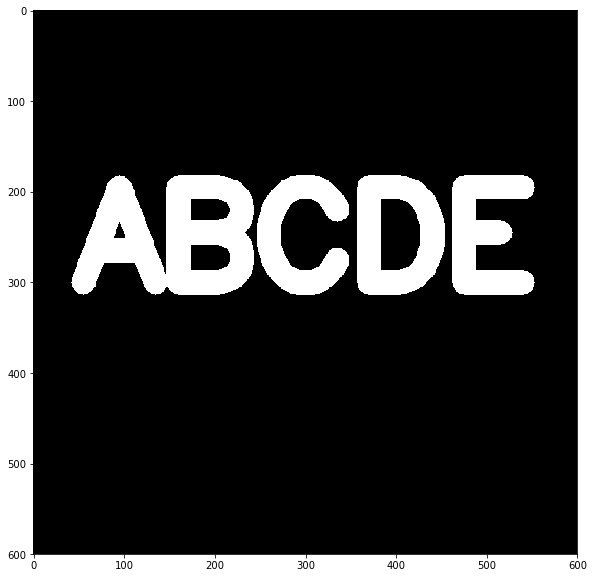

In [22]:
display_img(img)

## Closing

In [23]:
#Elimina ruido de objetos en primer plano.
#Ej. punto negros

In [24]:
img=load_img()

In [25]:
black_noise=np.random.randint(low=0,high=2,size=(600,600))

In [26]:
black_noise

array([[0, 0, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 1]])

In [27]:
black_noise=black_noise*-255

In [28]:
black_noise

array([[   0,    0,    0, ..., -255,    0,    0],
       [-255, -255,    0, ..., -255, -255, -255],
       [-255, -255, -255, ...,    0,    0, -255],
       ...,
       [-255,    0,    0, ...,    0, -255,    0],
       [   0,    0,    0, ..., -255,    0, -255],
       [   0,    0,    0, ..., -255,    0, -255]])

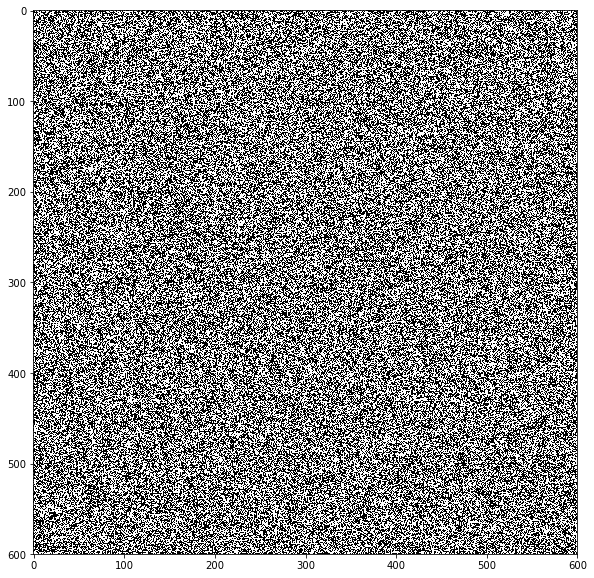

In [29]:
display_img(black_noise)

In [30]:
black_noise_img=img+black_noise 

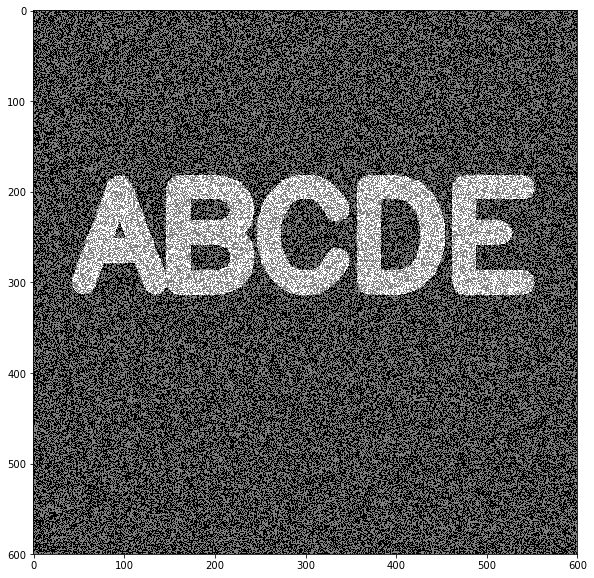

In [32]:
display_img(black_noise_img)

In [33]:
#Remplazar el valor -255 por 0
black_noise_img[black_noise_img==-255]=0

In [34]:
black_noise_img.min()

0.0

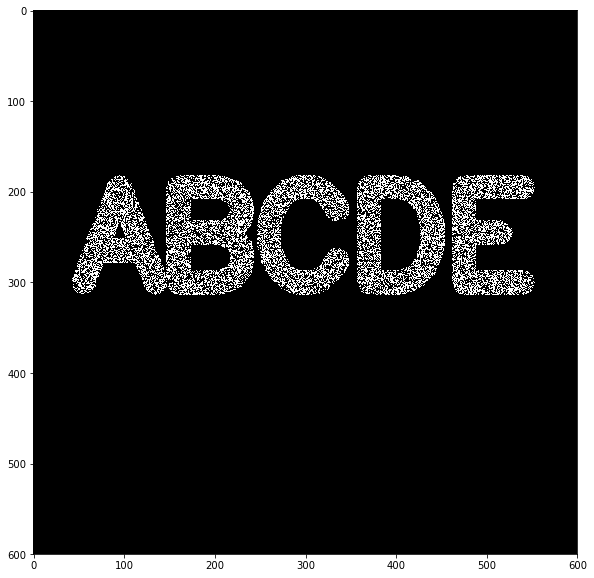

In [35]:
display_img(black_noise_img)

In [38]:
closing=cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)

#Closing, permite eliminar ruido.
#Ej. eliminar el ruido de una fotografia
#Fotografias oscuras los algoritmo de deep learning no lo detectan

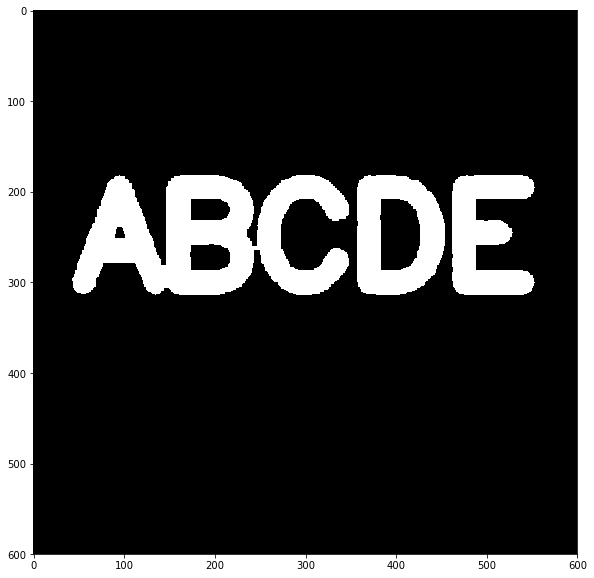

In [37]:
display_img(closing)

## Gradiente

In [43]:
#Operacion del tipo gradiente.
#Diferencia entre erosion y dilatacion
#Relacionado con el ruido.
#No se utiliza para obtener bordes, no confundir.

In [39]:
img=load_img()

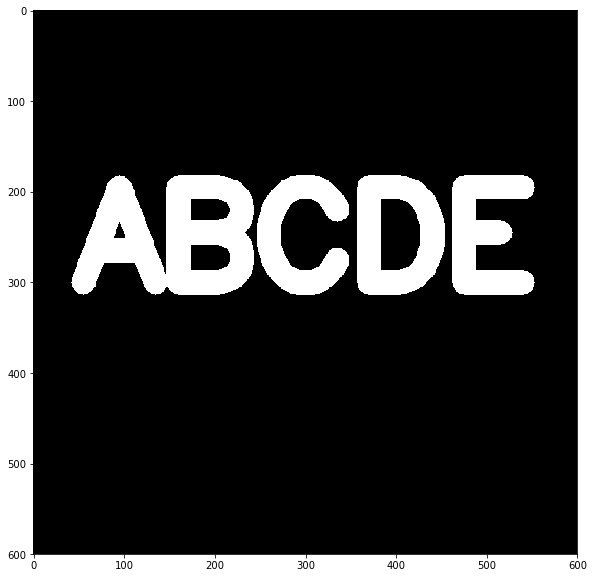

In [40]:
display_img(img)

In [41]:
gradient=cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

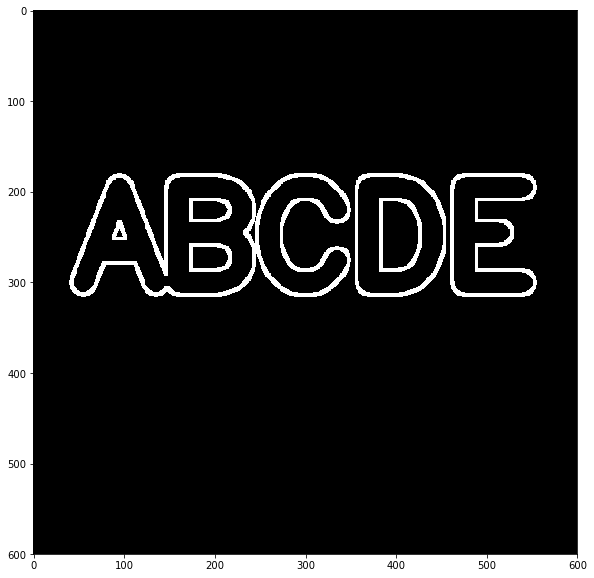

In [42]:
display_img(gradient)